# Evaluate Model

Evaluate a trained model.

In [2]:
import numpy as np

from jarvis.utils.display import imshow
from jarvis.utils.general import gpus

from tfcaidm import Jobs
from tfcaidm import Model
from tfcaidm import Dataset
from tfcaidm.models import audit


np.random.seed(0)

**Autoselect GPU (use only on caidm cluster)**

In [3]:
from jarvis.utils.general import gpus
gpus.autoselect()

[ 2021-11-19 13:57:09 ] WARNING 1 GPU device(s) requested but only 0 available 


In [4]:
YAML_PATH = "/home/brandon/tfcaidm-pkg/configs/ymls/covid_biomarker/pipeline.yml"

## Load hyperparameters

In [5]:
runs = Jobs(path=YAML_PATH)
params = runs.get_params()
hyperparams = params[0]

# --- Usually we will grab from save path...

In [6]:
hyperparams['meta/client'] = '/data/raw/covid_biomarker/data/ymls/client-dual-256.yml'
hyperparams['train/ys/pna/remove_bg'] = True
hyperparams['train/ys/ratio/remove_bg'] = True

## Load dataset

In [7]:
dataset = Dataset(hyperparams)
client = dataset.get_client(fold=0)
gen_train, gen_valid = client.create_generators(test=True)

## Load model

In [8]:
path = "/home/brandon/test_zone/caidm-projects/exp/runs/2021-08-05_22-55-02/0/unet_0.hdf5"
model = Model.load_model(path=path)

In [9]:
clf = audit.Classifier(model)

## Test model

In [10]:
x_inpt = []
y_true = []
y_pred = []

i = 0

for xs, ys in gen_train:
    pred = clf.forward(xs)['pna']
    pred = np.argmax(pred, axis=-1)
    
    x_inpt.append(xs['dat'])
    y_true.append(xs['pna'])
    y_pred.append(pred)
    
    if i ==100:
        break
        
    i+=1

[ 2021-11-19 13:57:18 ] [>...................] 0.017% : Iterating | 000001      

/miniconda/envs/jarvis/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:588: UserWarning: Input dict contained keys ['pna', 'ratio'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


[ 2021-11-19 13:58:24 ] [>...................] 1.732% : Iterating | 000101      

In [11]:
x_inpt = np.array(x_inpt)

In [12]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

### Visualize predictions

In [13]:
batch_idx = 1

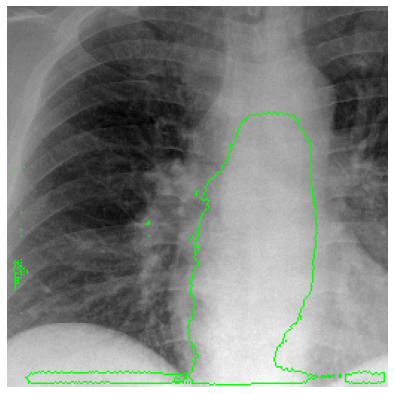

In [14]:
imshow(x_inpt[batch_idx], y_pred[batch_idx])

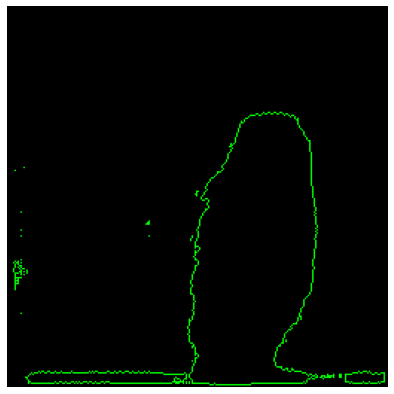

In [15]:
imshow(y_true[batch_idx], y_pred[batch_idx])

### Score model

In [16]:
%%time

clf.balanced_accuracy_score(y_true, y_pred)

CPU times: user 1.22 s, sys: 406 ms, total: 1.62 s
Wall time: 1.63 s


/home/brandon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.750803277044013

In [17]:
%%time

print(clf.classification_report(y_true, y_pred))

/home/brandon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brandon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86   6619136
           1       0.00      0.00      0.00         0

    accuracy                           0.75   6619136
   macro avg       0.50      0.38      0.43   6619136
weighted avg       1.00      0.75      0.86   6619136

CPU times: user 11.4 s, sys: 3.33 s, total: 14.7 s
Wall time: 14.8 s


/home/brandon/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
%%time

clf.confusion_matrix(y_true, y_pred)

CPU times: user 1.04 s, sys: 351 ms, total: 1.39 s
Wall time: 1.39 s


array([[4969669, 1649467],
       [      0,       0]])

In [19]:
%%time

clf.jaccard_score(y_true, y_pred)

CPU times: user 2.68 s, sys: 803 ms, total: 3.48 s
Wall time: 3.54 s


0.0

In [20]:
%%time

clf.f1_score(y_true, y_pred)

CPU times: user 2.7 s, sys: 716 ms, total: 3.41 s
Wall time: 3.44 s


0.0

In [21]:
%%time

clf.matthews_corrcoef(y_true, y_pred)

CPU times: user 2.38 s, sys: 1.07 s, total: 3.45 s
Wall time: 3.45 s


0.0

In [22]:
from scipy.spatial import distance

distance.cdist(y_true[0].reshape(8, -1), y_pred[0].reshape(8, -1), metric='euclidean')

array([[ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441],
       [ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
        60.28266749, 49.39635614, 54.12947441]])

In [23]:
distance.cdist(y_true[0].reshape(8, -1), y_pred[0].reshape(8, -1), metric='euclidean').diagonal()

array([ 0.        ,  0.        , 26.51414717, 53.8423625 , 61.3351449 ,
       60.28266749, 49.39635614, 54.12947441])

### Grad-CAM

In [24]:
from tfcaidm.models.utils.viz import GradCAM, GradCAMpp, overlay

In [25]:
xs, ys = next(gen_train)

[ 2021-11-19 13:58:53 ] [>...................] 1.749% : Iterating | 000102      

In [26]:
gm = GradCAM(model)

<Figure size 432x288 with 0 Axes>

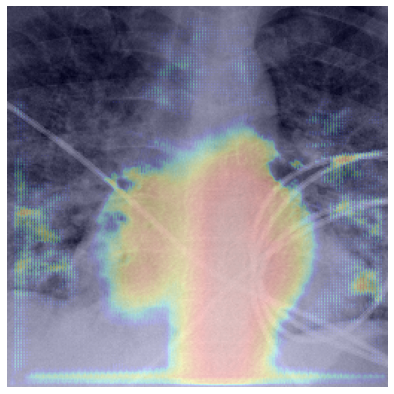

In [27]:
hm = gm.heatmap(xs["dat"], layer=-7, output_name="ratio", class_of_interest=0)
overlay(xs["dat"], hm)

<Figure size 432x288 with 0 Axes>

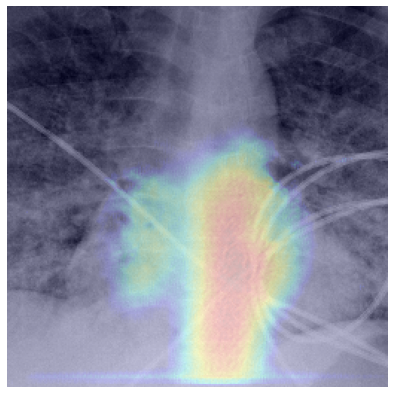

In [28]:
hm = gm.heatmap(xs["dat"], layer=-6, output_name="pna", class_of_interest=1)
overlay(xs["dat"], hm)

### Grad-CAM++

In [29]:
gmpp = GradCAMpp(model)

<Figure size 432x288 with 0 Axes>

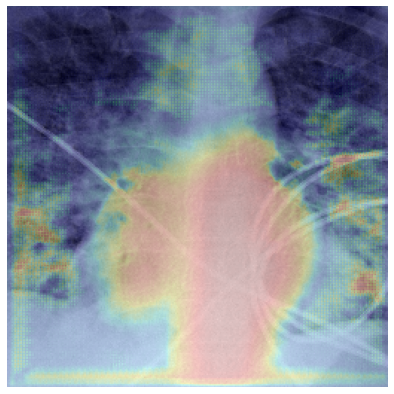

In [30]:
hmpp = gmpp.heatmap(xs["dat"], layer=-7, output_name="ratio", class_of_interest=0)
overlay(xs["dat"], hmpp)

<Figure size 432x288 with 0 Axes>

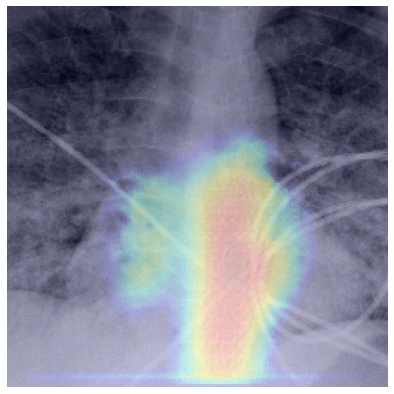

In [31]:
hmpp = gmpp.heatmap(xs["dat"], layer=-6, output_name="pna", class_of_interest=1)
overlay(xs["dat"], hmpp)